objective: 

take a network, $G$, a function $h:V(G)\rightarrow X$
We want:
* identify minima
* partition into basins
* indentify saddle points

In [17]:
import numpy as np
import networkx as nx
import math
import matplotlib
def perturb_function(f, node_list, epsilon=0.00000001):
    f_perturbed = {}
    for x in node_list:
        f_perturbed[x] = f(x) + np.random.uniform(low=0, high=epsilon)
    return lambda x: f_perturbed.get(x)
    

In [2]:
G = nx.karate_club_graph()

In [3]:
import math
h = perturb_function(lambda x: -math.log(G.degree(x)), G.nodes())

Algorithm 1:

In [20]:
def Fast_search_of_nondegenerate_critical_nodes(G, h):
    graph = G.copy()
    C = {}
    basin = {}
    blank_nodes={}

    for k in range(len(G)):
        C[k] = {}
        vertex_set = sorted(graph.nodes(),key=h)
        for j, v in enumerate(vertex_set):
            N = {y for y in graph.neighbors(v) if y in vertex_set[0:j]}
            if not N:
                C[k].update({v:{v}})
                basin.update({v:v})
            elif len({basin.get(y) for y in N if y in basin}) == 1:
                basin[v] = {basin.get(y) for y in N}.pop()
                C[k][basin[v]].add(v)
        blank_nodes[k+1] = [x for x in vertex_set if x not in basin]
        fig=matplotlib.pyplot.figure()
        nx.draw(graph.subgraph(x for x in vertex_set if x in basin), pos=layout)
        graph = graph.subgraph(blank_nodes[k+1])
    return C, basin, blank_nodes

/home/isla/anaconda3/envs/whitakerlab/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


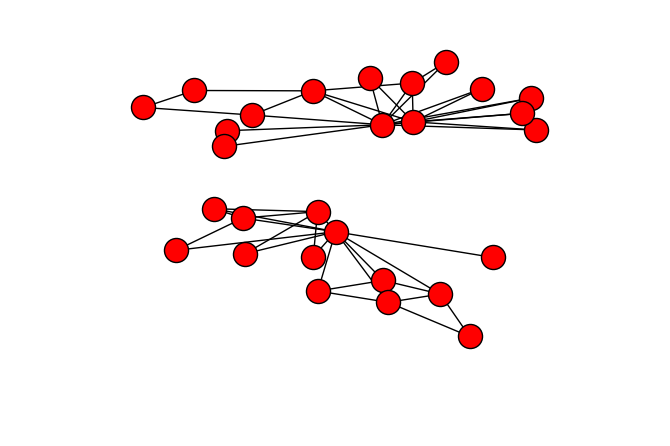

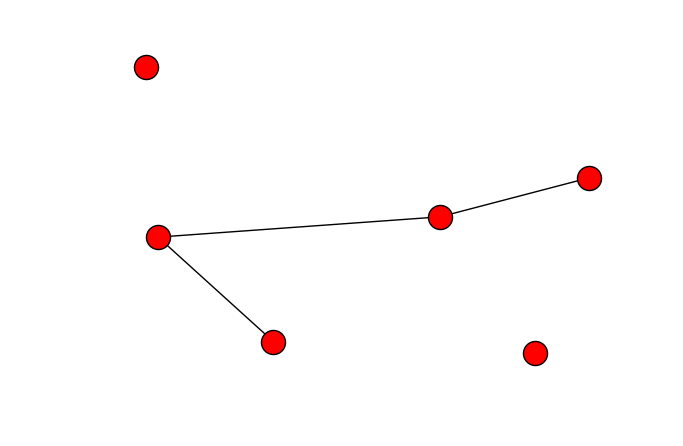

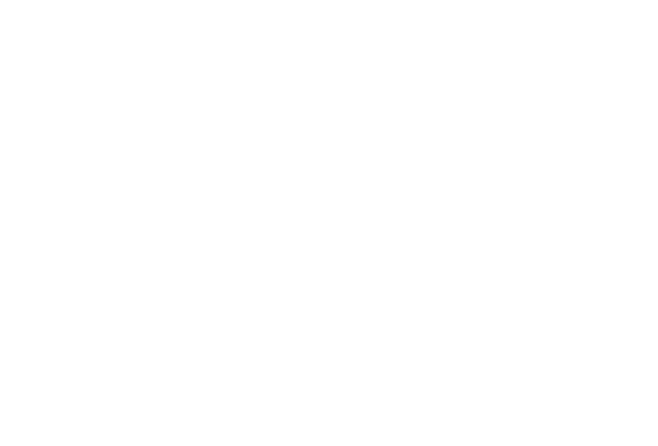

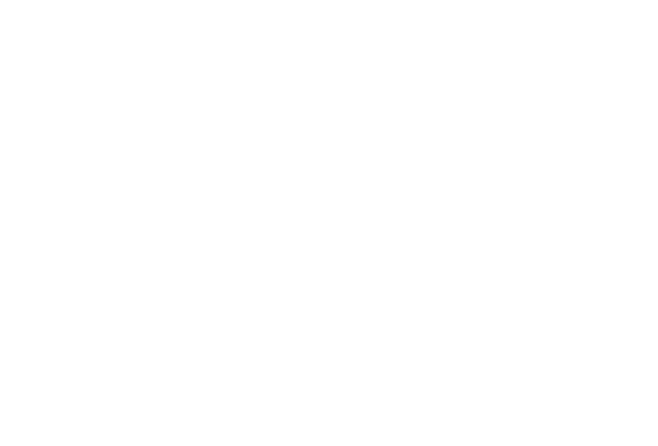

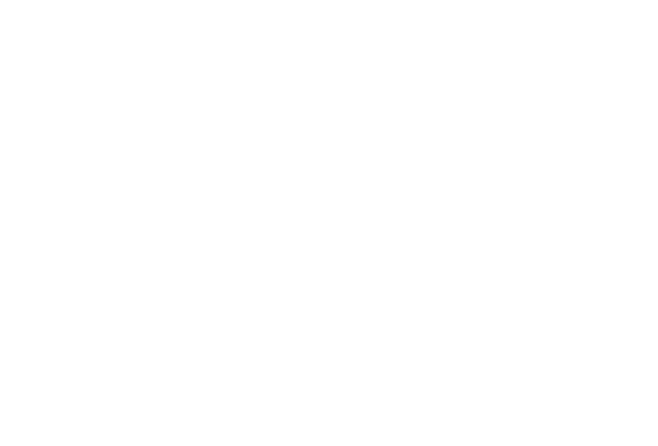

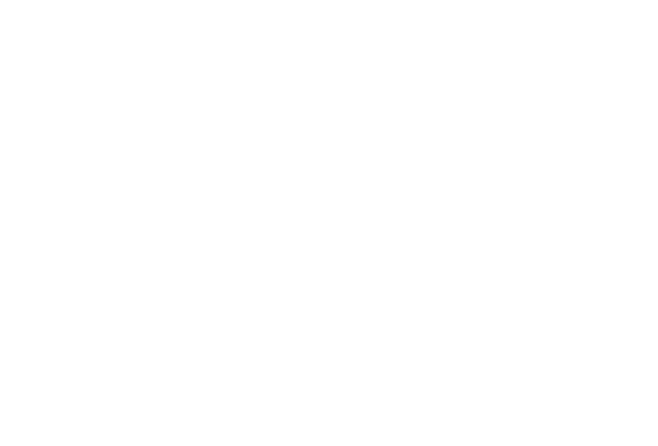

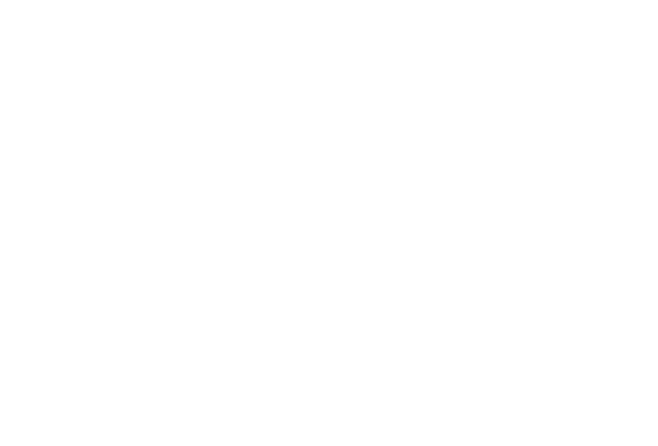

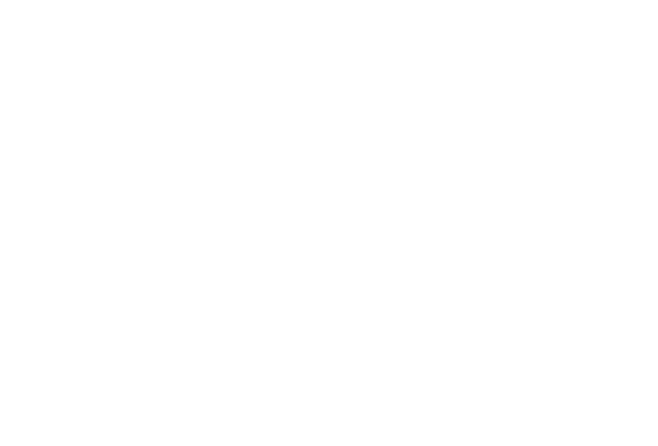

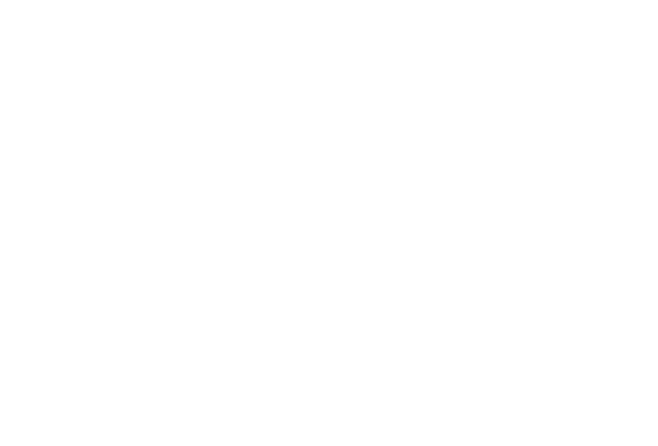

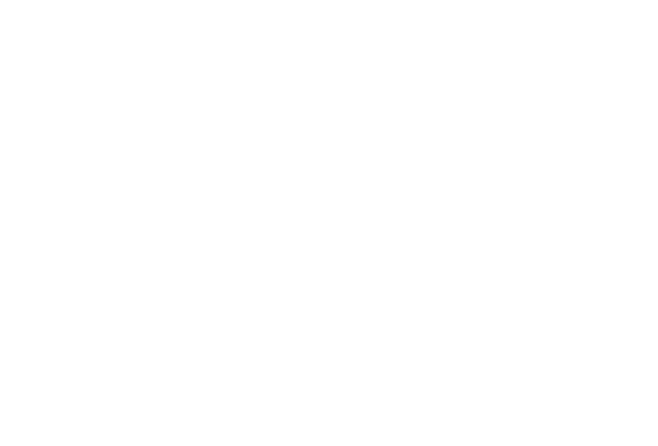

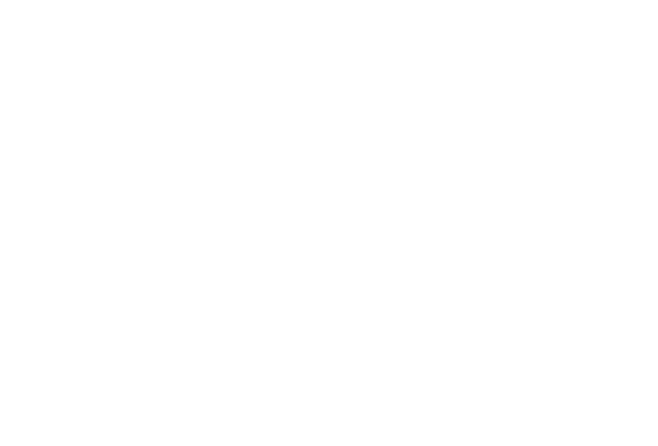

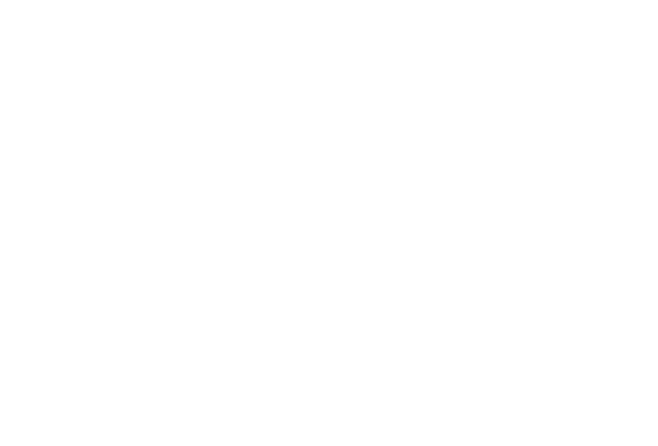

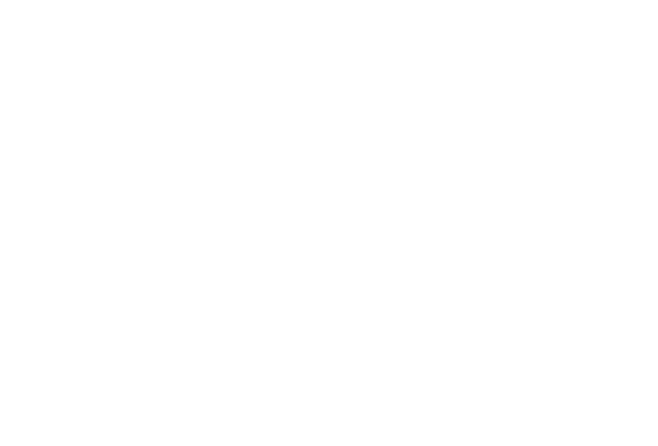

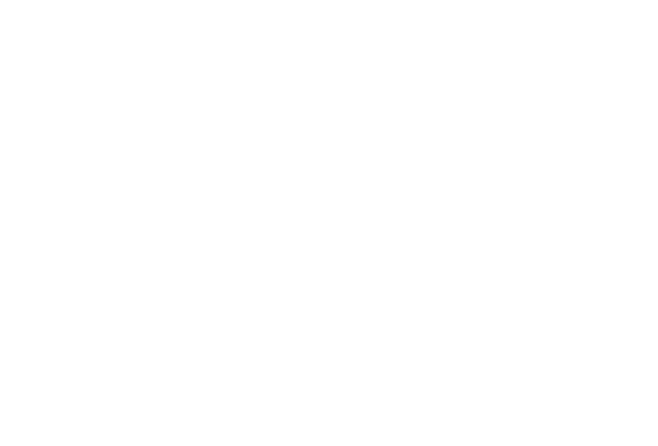

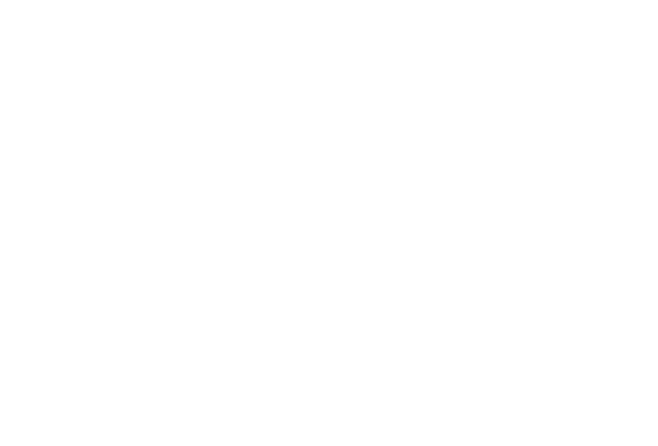

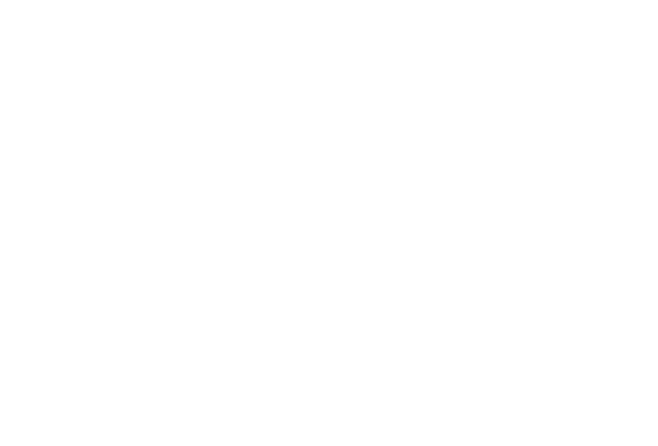

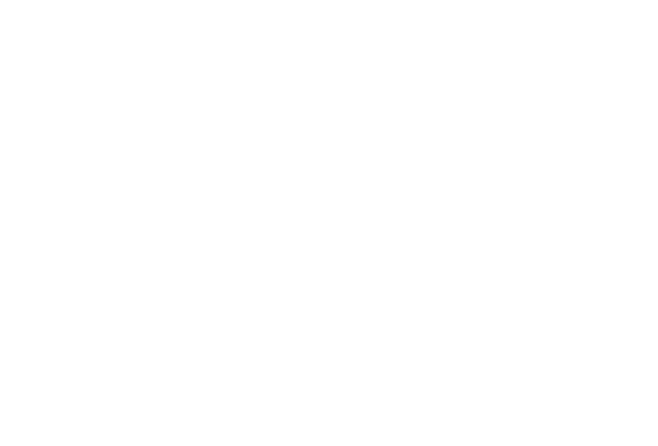

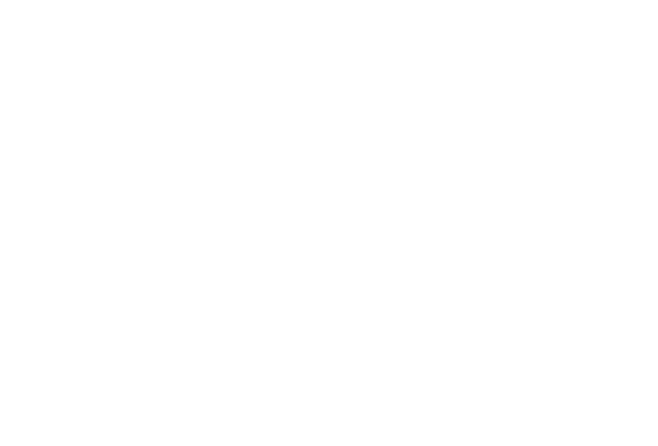

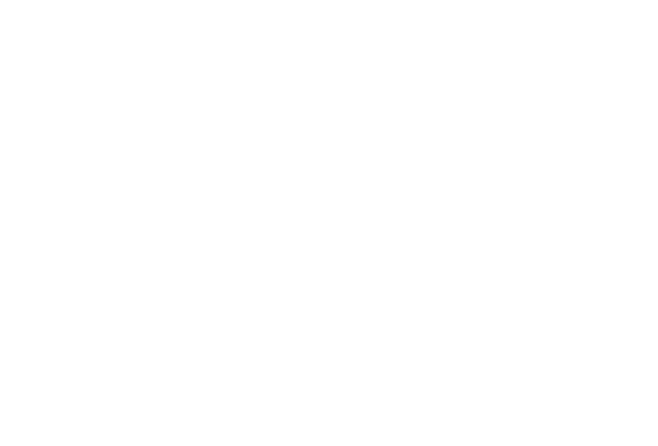

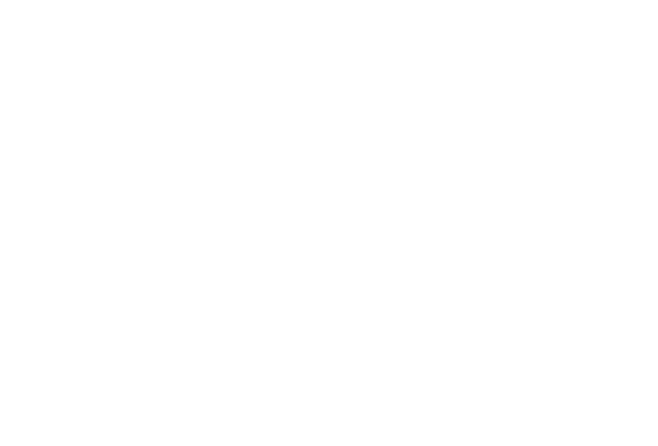

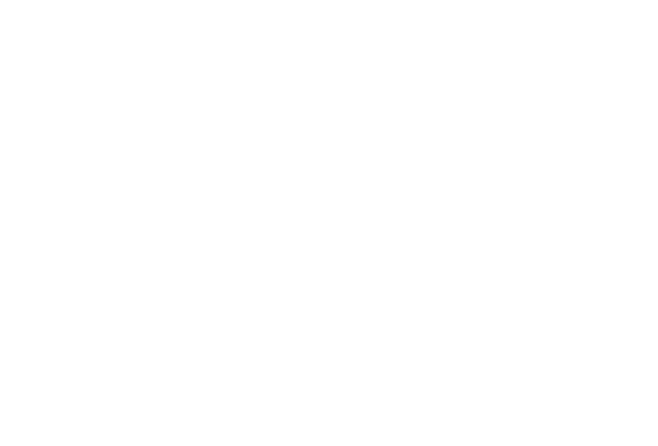

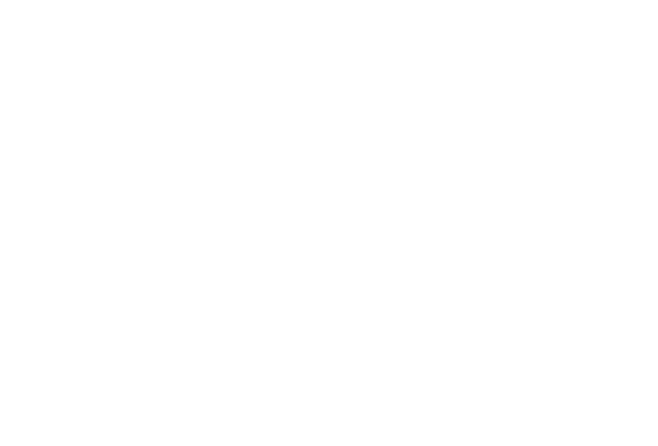

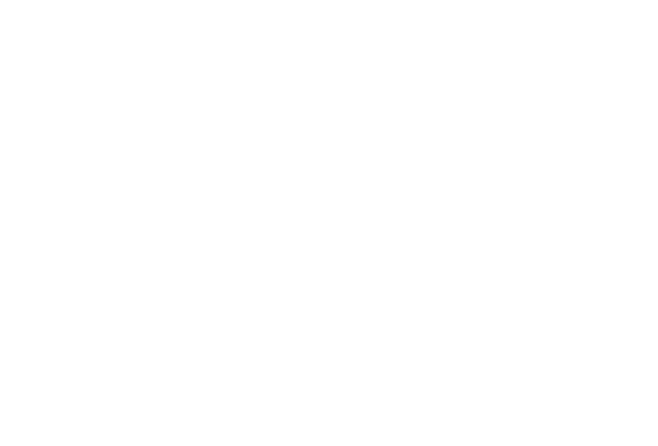

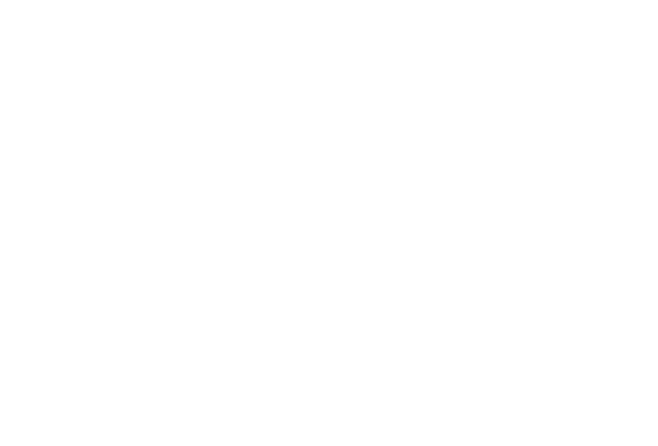

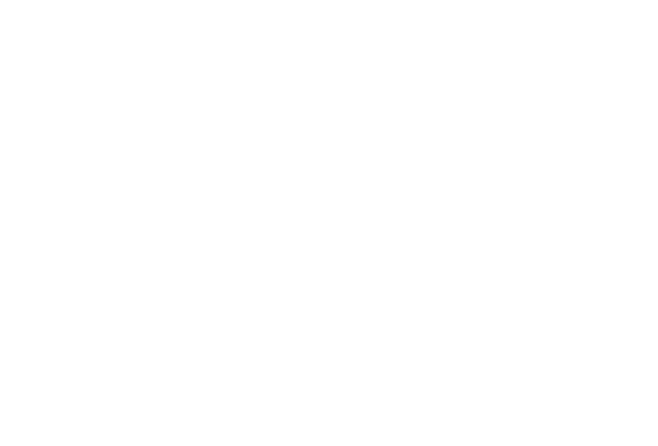

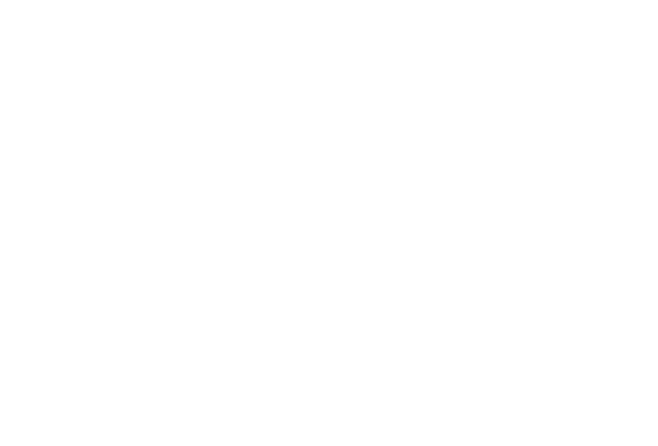

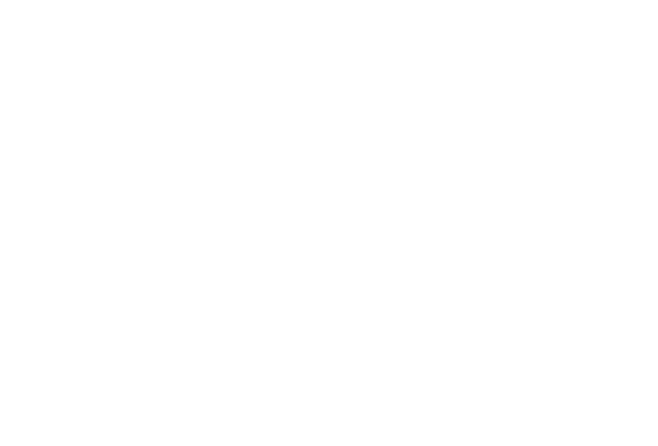

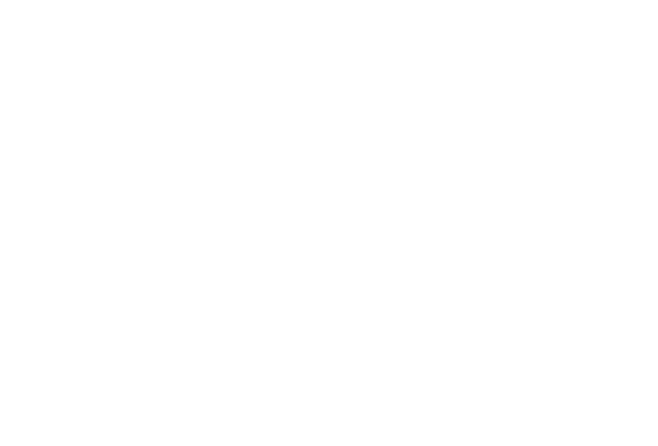

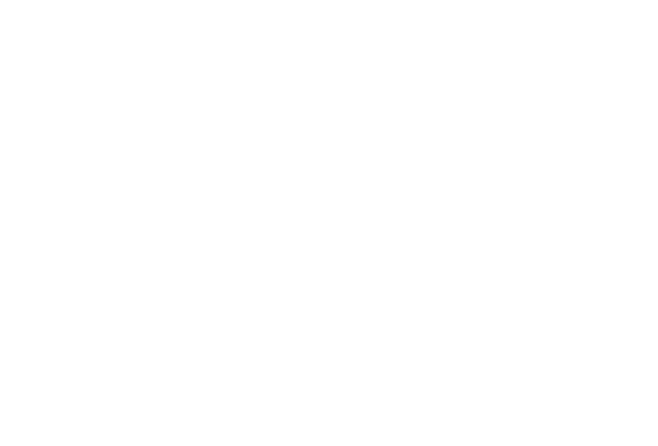

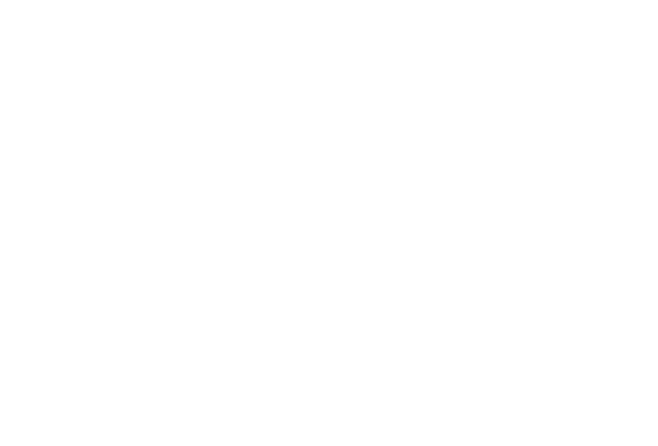

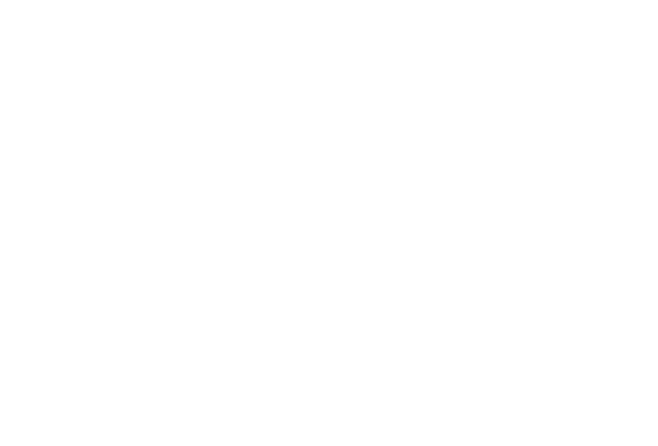

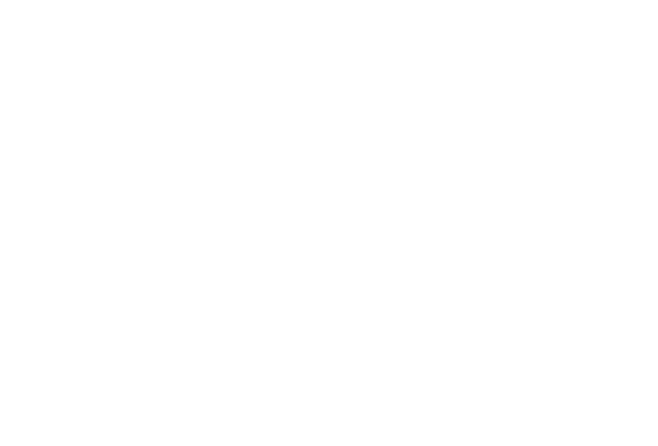

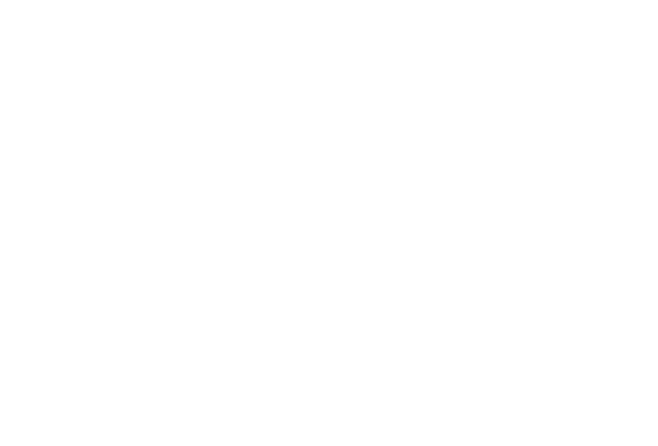

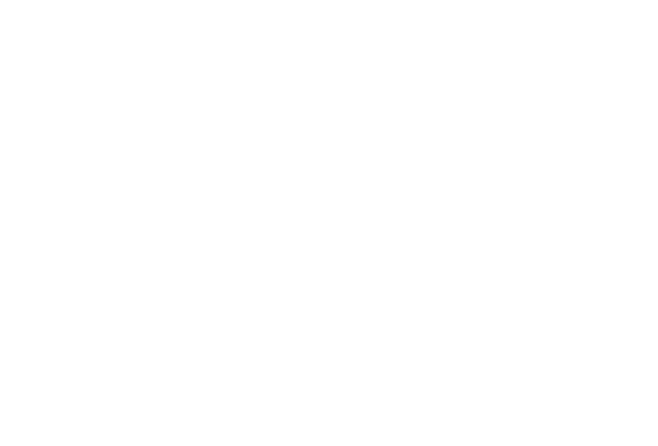

In [21]:
C, basin, blank_nodes = Fast_search_of_nondegenerate_critical_nodes(G,h)
for node, value in basin.items():
    G.nodes[node]['basin'] = value

In [6]:
layout = nx.spring_layout(G)

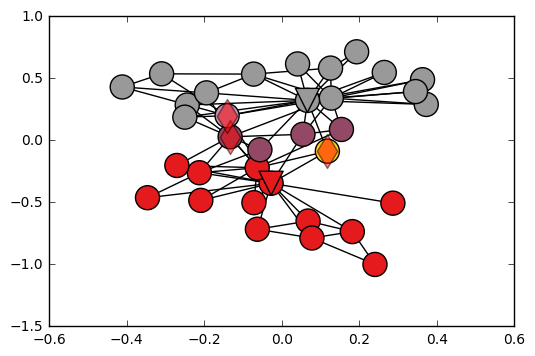

In [7]:
%matplotlib inline   
nx.draw_networkx_edges(G, pos=layout)
nx.draw_networkx_nodes(G, pos=layout, nodesize=[h(x)*300 for x in G.nodes()], node_color=[v for k,v in G.nodes.data('basin')], cmap='Set1')

nx.draw_networkx_nodes(G.subgraph(C[1]), pos=layout, nodesize=20, node_shape='d', alpha=0.5, nodecolor=[v for k,v in G.subgraph(C[0]).nodes.data('basin')], cmap='Set1')
nx.draw_networkx_nodes(G.subgraph(C[2]), pos=layout, nodesize=20, node_shape='s', alpha=0.5, nodecolor=[v for k,v in G.subgraph(C[0]).nodes.data('basin')], cmap='Set1')
nx.draw_networkx_nodes(G.subgraph(C[0]), pos=layout, nodesize=[h(x)*300 for x in G.subgraph(C[0]).nodes()], node_color=[v for k,v in G.subgraph(C[0]).nodes.data('basin')], node_shape='v', cmap='Set1')


In [8]:
for k, c_k in C.items():
    if c_k:
        print('C_{}:'.format(k))
        for att, val in c_k.items():
            print(att, ', basin:', val)
        print('\n')

C_0:
0 , basin: {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 16, 17, 21}
33 , basin: {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29}


C_1:
2 , basin: {8, 2, 13, 30}
19 , basin: {19}
31 , basin: {31}


